In [1]:
!git clone https://github.com/pdhruv93/YOLO-Face-Recognition-DLIB.git

Cloning into 'YOLO-Face-Recognition-DLIB'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 307 (delta 7), reused 17 (delta 0), pack-reused 271
Receiving objects: 100% (307/307), 161.71 MiB | 36.41 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
%cd YOLO-Face-Recognition-DLIB//opencv-face-recognition-dlib

/content/YOLO-Face-Recognition-DLIB/opencv-face-recognition-dlib


In [3]:
!pip install face_recognition

    100% |████████████████████████████████| 100.2MB 353kB/s 
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
from matplotlib import pyplot as plt

In [0]:
datasetPath="dataset//dhruv//"
encodingsPath="encodings.pickle"
# command line arguments in dict form
#dataset-- path to our dataset(input images)
#encodings -- path to our face encodings .pickle file
#detection-method--cnn/hog..The CNN method is more accurate but slower. HOG is faster but less accurate.
args={'dataset': datasetPath , 'encodings': encodingsPath , 'detection_method': "hog"}

In [6]:
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images(args["dataset"]))
print(imagePaths)
 
# These two lists will contain the face encodings and corresponding names for each person in the dataset(currently only 1 person)
knownEncodings = []
knownNames = []

[INFO] quantifying faces...
['dataset//dhruv//IMG-20180903-WA0121.jpg', 'dataset//dhruv//IMG-20180903-WA0120.jpg', 'dataset//dhruv//IMG_20180411_145005.jpg', 'dataset//dhruv//IMG_20180605_211534.jpg', 'dataset//dhruv//IMG_20180526_095231.jpg', 'dataset//dhruv//IMG-20170911-WA0000.jpg', 'dataset//dhruv//IMG_5248.JPG', 'dataset//dhruv//IMG_3760.JPG', 'dataset//dhruv//IMG_20181125_190807.jpg', 'dataset//dhruv//IMG_20180410_135431.jpg', 'dataset//dhruv//IMG_20180601_153933.jpg', 'dataset//dhruv//IMG_20180520_184209.jpg', 'dataset//dhruv//IMG_20180520_184325.jpg', 'dataset//dhruv//IMG_20180608_233825.jpg', 'dataset//dhruv//IMG-20180903-WA0129.jpg', 'dataset//dhruv//IMG_20180413_190414.jpg', 'dataset//dhruv//IMG_20180605_211540.jpg', 'dataset//dhruv//IMG_20180408_131938.jpg', 'dataset//dhruv//IMG_20181203_132032.jpg', 'dataset//dhruv//IMG_20180605_211515.jpg', 'dataset//dhruv//IMG_20180929_170034.jpg', 'dataset//dhruv//IMG_20181003_221421.jpg', 'dataset//dhruv//IMG_20180404_234725.jpg', 'dat

In [7]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
  print("[INFO] processing image {}/{}".format(i + 1,len(imagePaths)))
  
  # extract the person name from the image path
  # dataset//dhruv//IMG_20180605_211534.jpg.. 0 is dataset 1 is dhruv
  name = imagePath.split("//")[1]
  
  # load the input image and convert it from BGR (OpenCV ordering) to dlib ordering (RGB)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  # we’re going to detect a face and get the (x, y)-coordinates of the bounding boxes corresponding to each face in the input image
  #NOTE: If there are multiple faces in an image, the module treats that all are of single person.
  boxes = face_recognition.face_locations(rgb,model=args["detection_method"])
  
  # compute the facial embedding for the face
  encodings = face_recognition.face_encodings(rgb, boxes)
  
  # loop over the encodings
  for encoding in encodings:
    # add each encoding + name to our set of known names and encodings
    knownEncodings.append(encoding)
    knownNames.append(name)

[INFO] processing image 1/32
[INFO] processing image 2/32
[INFO] processing image 3/32
[INFO] processing image 4/32
[INFO] processing image 5/32
[INFO] processing image 6/32
[INFO] processing image 7/32
[INFO] processing image 8/32
[INFO] processing image 9/32
[INFO] processing image 10/32
[INFO] processing image 11/32
[INFO] processing image 12/32
[INFO] processing image 13/32
[INFO] processing image 14/32
[INFO] processing image 15/32
[INFO] processing image 16/32
[INFO] processing image 17/32
[INFO] processing image 18/32
[INFO] processing image 19/32
[INFO] processing image 20/32
[INFO] processing image 21/32
[INFO] processing image 22/32
[INFO] processing image 23/32
[INFO] processing image 24/32
[INFO] processing image 25/32
[INFO] processing image 26/32
[INFO] processing image 27/32
[INFO] processing image 28/32
[INFO] processing image 29/32
[INFO] processing image 30/32
[INFO] processing image 31/32
[INFO] processing image 32/32


In [8]:
print(len(knownNames))

32


In [9]:
!ls
!rm encodings.pickle

dataset  examples  Face_Recognition_DLIB_Image.ipynb
rm: cannot remove 'encodings.pickle': No such file or directory


In [10]:
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open(args["encodings"], "wb")
f.write(pickle.dumps(data))
f.close()
#TILL NOW WE HAVE FOUND THE ENCODINGS OF FACES IN INPUT DATSET

[INFO] serializing encodings...


In [11]:
!ls

dataset  encodings.pickle  examples  Face_Recognition_DLIB_Image.ipynb


In [0]:
inputImagePath="examples//IMG_0962.JPG"
encodingsPath="encodings.pickle"
# command line arguments in dict form
#image-- path to our image on which we will detect face
#encodings -- path to our face encodings .pickle file
#detection-method--cnn/hog..The CNN method is more accurate but slower. HOG is faster but less accurate.
args={'image': inputImagePath , 'encodings': encodingsPath , 'detection_method': "hog"}

In [13]:
# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open(args["encodings"], "rb").read())
 
# load the input image and convert it from BGR to RGB
image = cv2.imread(args["image"])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
# detect the (x, y)-coordinates of the bounding boxes corresponding to each face in the input image, then compute the facial embeddings for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,model=args["detection_method"])
encodings = face_recognition.face_encodings(rgb, boxes)

print("{} faces detected".format(len(boxes)))
 
# initialize the list of names for each face detected
names = []

[INFO] loading encodings...
[INFO] recognizing faces...
3 faces detected


In [14]:
# loop over the facial embeddings
for encoding in encodings:
  # attempt to match each face in the input image to our known encodings
  #This function returns a list of True / False  values, one for each image in our dataset. 
  #For our example, there are 32 images in the dataset and therefore the returned list will have 32 boolean values.
  matches = face_recognition.compare_faces(data["encodings"],encoding)
  name = "Unknown"
  
  # check to see if we have found a match
  if True in matches:
    #get indexes where this particular face(encoding) was matched in the dataset images
    matchedIdxs = [i for (i, b) in enumerate(matches) if b]
    print("Face found in {} images".format(len(matchedIdxs)))
    counts = {}
    
    # loop over the matched indexes and maintain a count for each recognized face
    for i in matchedIdxs:
      name = data["names"][i]
      counts[name] = counts.get(name, 0) + 1
    
    # determine the current face with the largest number of voted face
    name = max(counts, key=counts.get)
    
  # if there would be no True in matched indexes store name to Unknown
  names.append(name)
  #now we have got name for each face in our input image
print(names)

Face found in 31 images
['dhruv', 'Unknown', 'Unknown']


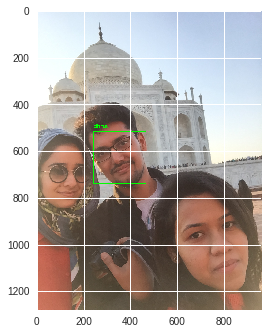

In [15]:
# for very box that is detected, there would be a name
for ((top, right, bottom, left), name) in zip(boxes, names):
  if(name != 'Unknown'):
    # draw the predicted face name on the image
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 255, 0), 2)

# show the output image
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(image,shape=(50,50))
plt.show()